# Census Income
## Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). 
## The prediction task is to determine whether a person makes over $50K a year.
Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. 

These are:
1.	A single cell estimate of the population 16+ for each state.

2.	Controls for Hispanic Origin by age and sex.

3.	Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

Dataset Link-
https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Census%20Income/Census%20Income.csv

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Census%20Income/Census%20Income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [5]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.Income.value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [12]:
df.drop('Education', inplace=True, axis=1)
df

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## CHECK DUPLICATE DATA AND REMOVE IT

In [13]:
df.duplicated().sum()

24

In [14]:
df = df[~df.duplicated()]

In [15]:
df.duplicated().sum()

0

In [18]:
df.Sex.value_counts()

 Male      21774
 Female    10762
Name: Sex, dtype: int64

In [21]:
# discard spaces from entries
columns = ['Workclass', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
for column in columns:
    df[column] = df[column].str.strip()

In [22]:
df.Sex.value_counts()

Male      21774
Female    10762
Name: Sex, dtype: int64

In [23]:
df.Workclass.value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

In [24]:
# changing "?" to Unknown

change_columns = ['Workclass', 'Occupation', 'Native_country']

for column in change_columns:
        df[column] = df[column].replace({'?': 'Unknown'})

In [25]:
df.Workclass.value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
Unknown              1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

In [26]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Text(95.72222222222221, 0.5, 'Education Class')

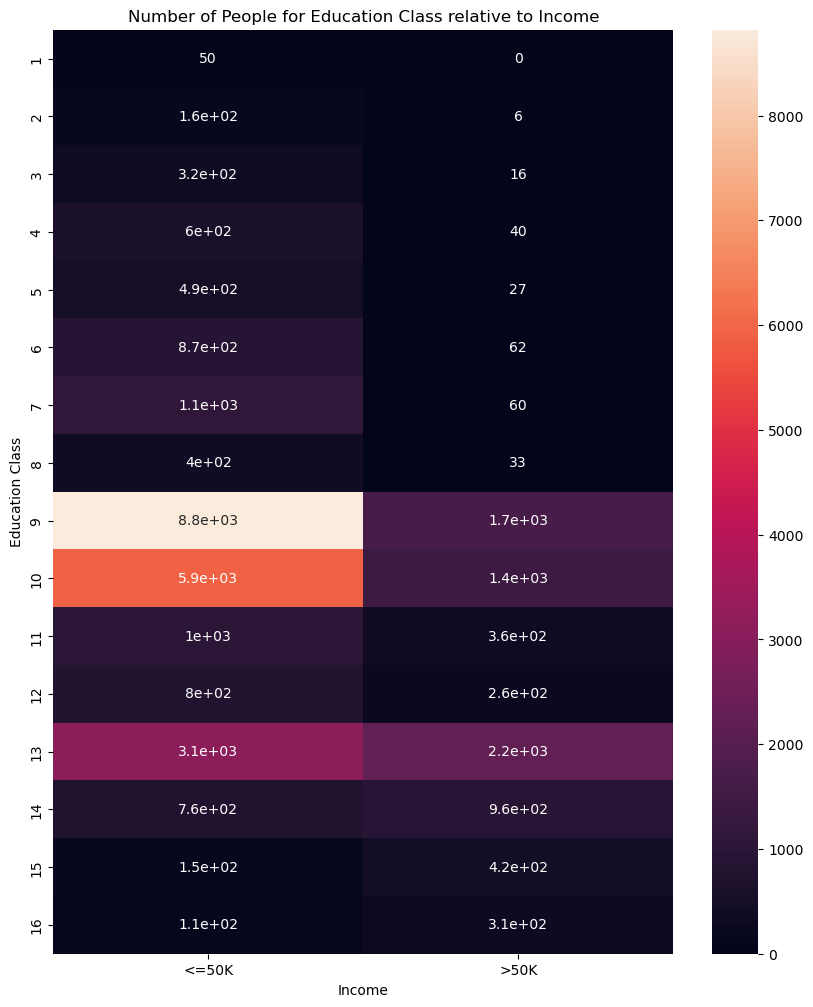

In [28]:
## Use Heatmap

plt.figure(figsize=[10,12])
 
values = df.groupby(['Education_num', 'Income']).size()
values = values.reset_index(name = 'count')
values = values.pivot(index = 'Education_num', columns = 'Income', values = 'count').fillna(0)

sns.heatmap(values, annot = True)

plt.title('Number of People for Education Class relative to Income')

plt.xlabel('Income')

plt.ylabel('Education Class')

#### In the graph above, we can see that people with education classes of 9 & 10 make up the highest portion in the dataset. Also, we notice that people with education class of 14 to 16 proportionally usually make >50k as income in the statistics we have in the dataset, unlike lesser education classes where they usually make <=50k as income.

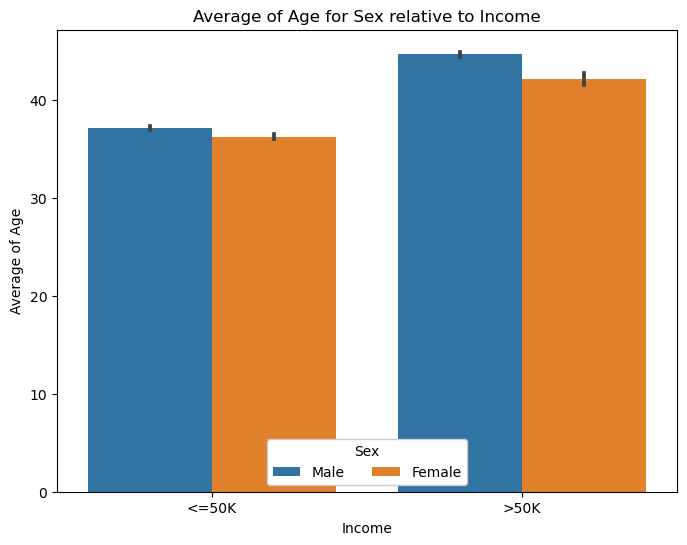

In [29]:
# Bar Chart 

plt.figure(figsize=[8,6])

ax = sns.barplot(data = df, x = 'Income', y = 'Age', hue = 'Sex')

ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Sex')

plt.title('Average of Age for Sex relative to Income')

plt.xlabel('Income')

plt.ylabel('Average of Age');

### The figure shows in general that the people with >50K has a higher average age than the ones with <=50K. And in both cases of income, we see that the male category has a little bit greater age average than the female category.

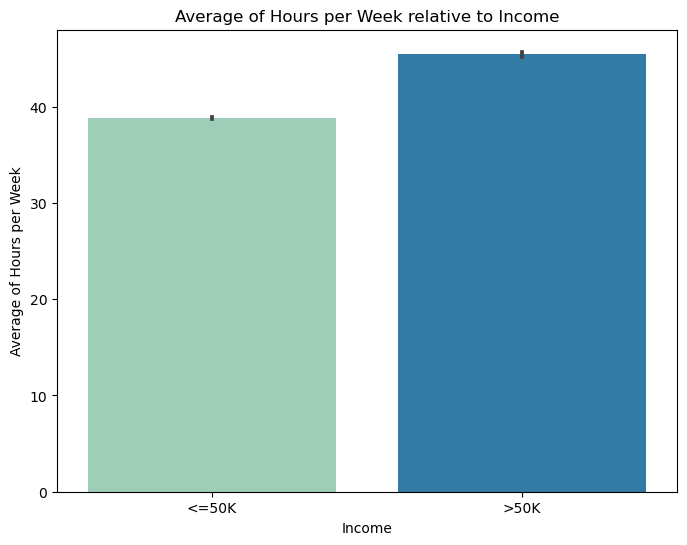

In [30]:
# Bar Chart 

plt.figure(figsize=[8,6])

sns.barplot(data=df, x='Income', y='Hours_per_week', palette='YlGnBu')

plt.title('Average of Hours per Week relative to Income')

plt.xlabel('Income')

plt.ylabel('Average of Hours per Week');

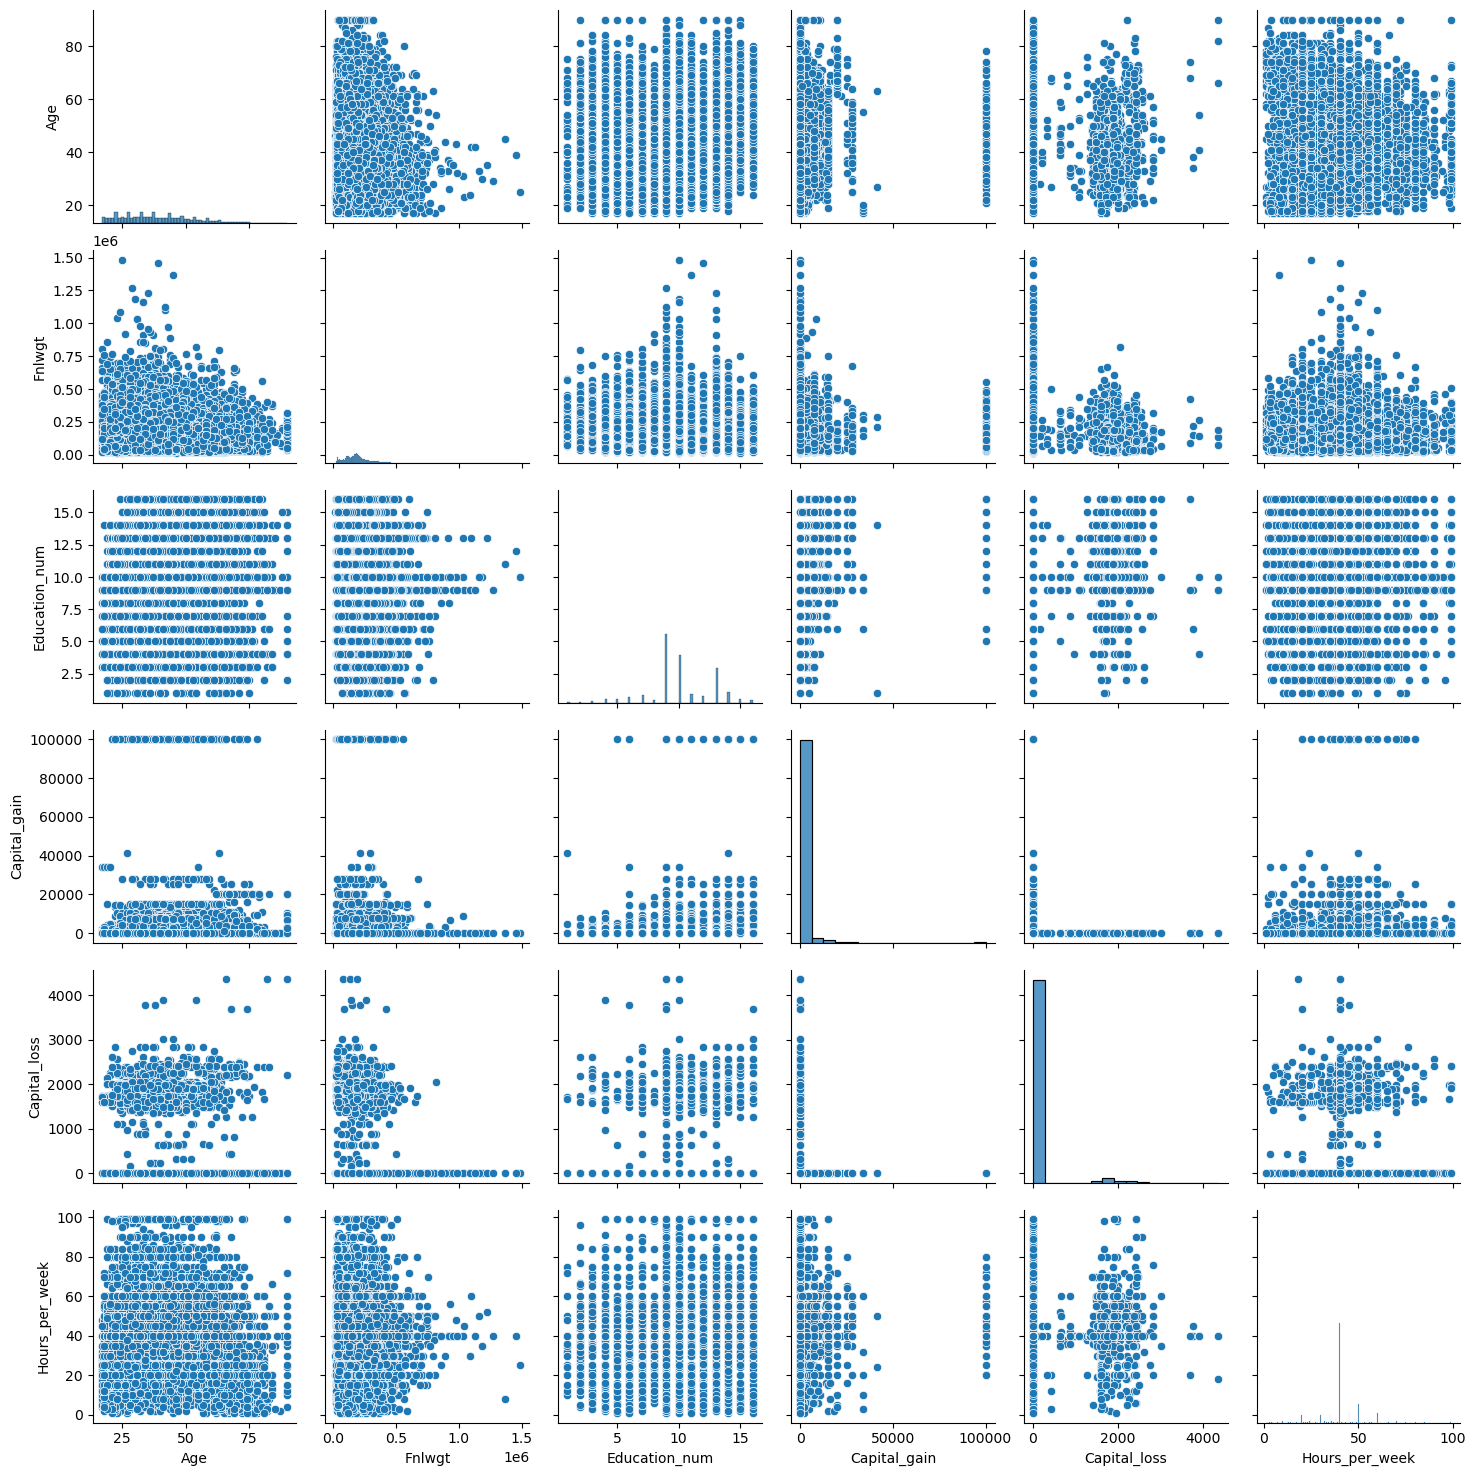

In [31]:
sns.pairplot(df)

In [32]:
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076448,0.036224,0.077676,0.057745,0.068515
Fnlwgt,-0.076448,1.000000,-0.043353,0.000433,-0.010267,-0.018900
Education_num,0.036224,-0.043353,1.000000,0.122661,0.079901,0.148426
Capital_gain,0.077676,0.000433,0.122661,1.000000,-0.031638,0.078408
Capital_loss,0.057745,-0.010267,0.079901,-0.031638,1.000000,0.054229
Hours_per_week,0.068515,-0.018900,0.148426,0.078408,0.054229,1.000000


In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [36]:
x = df.drop('Income', axis=1)
y = df['Income']

In [37]:
from sklearn.ensemble import ExtraTreesClassifier

ETC = ExtraTreesClassifier(random_state=42)

In [39]:
ETC.fit(x, y)

ExtraTreesClassifier(random_state=42)

In [40]:
feature_imp = ETC.feature_importances_

In [42]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 15.45
1 4.16
2 16.34
3 12.75
4 7.57
5 7.36
6 8.49
7 1.41
8 3.0
9 9.38
10 3.01
11 9.13
12 1.96


In [43]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32536 non-null  int64
 1   Workclass       32536 non-null  int32
 2   Fnlwgt          32536 non-null  int64
 3   Education_num   32536 non-null  int64
 4   Marital_status  32536 non-null  int32
 5   Occupation      32536 non-null  int32
 6   Relationship    32536 non-null  int32
 7   Race            32536 non-null  int32
 8   Sex             32536 non-null  int32
 9   Capital_gain    32536 non-null  int64
 10  Capital_loss    32536 non-null  int64
 11  Hours_per_week  32536 non-null  int64
 12  Native_country  32536 non-null  int32
dtypes: int32(7), int64(6)
memory usage: 2.6 MB


In [46]:
x = x.drop(['Workclass','Race', 'Sex', 'Capital_loss', 'Native_country'], axis=1)

## Feature Scaling

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
for col in x.columns:
    scaler = StandardScaler()
    x[col] = scaler.fit_transform(x[col].values.reshape(-1, 1))

In [49]:
round(y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    75.91 %
1    24.09 %
Name: Income, dtype: object

In [52]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### LogisticRegression

In [54]:
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression(random_state=42)

log_reg.fit(x_train, y_train)

y_pred_log_reg = log_reg.predict(x_test)

## KNN Classifier

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)

## Support Vector Classifier

In [56]:
from sklearn.svm import SVC
svc = SVC(random_state=42)

svc.fit(x_train, y_train)

y_pred_svc = svc.predict(x_test)

## Decision Tree Classifier

In [57]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

dt.fit(x_train, y_train)

y_pred_dt = dt.predict(x_test)

## Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

rfc.fit(x_train, y_train)

y_pred_rfc = rfc.predict(x_test)

## XGB Classifier

In [60]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

xgb.fit(x_train, y_train)

y_pred_xgb = xgb.predict(x_test)

## Model Evaluation

In [61]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [62]:
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_log_reg) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_log_reg) * 100, 2))

Logistic Regression:
Accuracy score: 82.3
F1 score: 53.4


In [63]:
print('KNN Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_knn) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_knn) * 100, 2))

KNN Classifier:
Accuracy score: 83.28
F1 score: 63.32


In [64]:
print('Support Vector Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_svc) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_svc) * 100, 2))

Support Vector Classifier:
Accuracy score: 85.05
F1 score: 63.27


In [65]:
print('Decision Tree Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_dt) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_dt) * 100, 2))

Decision Tree Classifier:
Accuracy score: 80.52
F1 score: 60.08


In [66]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_rfc) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_rfc) * 100, 2))

Random Forest Classifier:
Accuracy score: 84.53
F1 score: 65.17


In [67]:
print('XGB Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_xgb) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_xgb) * 100, 2))

XGB Classifier:
Accuracy score: 85.56
F1 score: 67.54


### Hyperparameter Tuning

In [68]:
from sklearn.model_selection import RandomizedSearchCV

In [69]:
n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)]

max_depth = [int(x) for x in np.linspace(40, 150, num=15)]

In [70]:
param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}


In [71]:
rf_tuned = RandomForestClassifier(random_state=42)

In [72]:
rf_cv = RandomizedSearchCV(
    estimator=rf_tuned, param_distributions=param_dist, cv=5, random_state=42)

In [74]:
rf_cv.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'n_estimators': [40, 47, 55, 63, 71, 79,
                                                         87, 95, 102, 110, 118,
                                                         126, 134, 142, 150]},
                   random_state=42)

In [75]:
rf_cv.best_score_

0.8441296619617576

In [76]:
rf_cv.best_params_

{'n_estimators': 142, 'max_depth': 110}

In [77]:
rf_best = RandomForestClassifier(
    max_depth=110, n_estimators=142, random_state=42)

In [78]:
rf_best.fit(x_train, y_train)

RandomForestClassifier(max_depth=110, n_estimators=142, random_state=42)

In [79]:
y_pred_rf_best = rf_best.predict(x_test)

In [80]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_rf_best) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_rf_best) * 100, 2))

Random Forest Classifier:
Accuracy score: 84.5
F1 score: 65.12


## confusion matrix

In [81]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf_best)


In [82]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf_best))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4961
           1       0.70      0.61      0.65      1547

    accuracy                           0.84      6508
   macro avg       0.79      0.76      0.78      6508
weighted avg       0.84      0.84      0.84      6508



### Conclusion:
1. In this project, we build various models like logistic regression, knn classifier, support vector classifier, decision tree classifier, random forest classifier and xgboost classifier.

2. A hyperparameter tuned random forest classifier gives the highest accuracy score of 84.53 and f1 score of 84.